<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Conceptos/InicioRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

$X^{NxM}$

$Y^{Nx1}$

$f: \mathbf{R}^{NxM} -----> \mathbf{R}^{Nx1}$

N = Número de filas ; M = Número de columnas


y = w1*x1 + w2*x2 + ... + b

y = w1*x1 + w2*x2 + ... + wo*xo ---> wo = b, x0 = 1

Y = [w1, w2, w0] [x1, x2, 1].T


In [55]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

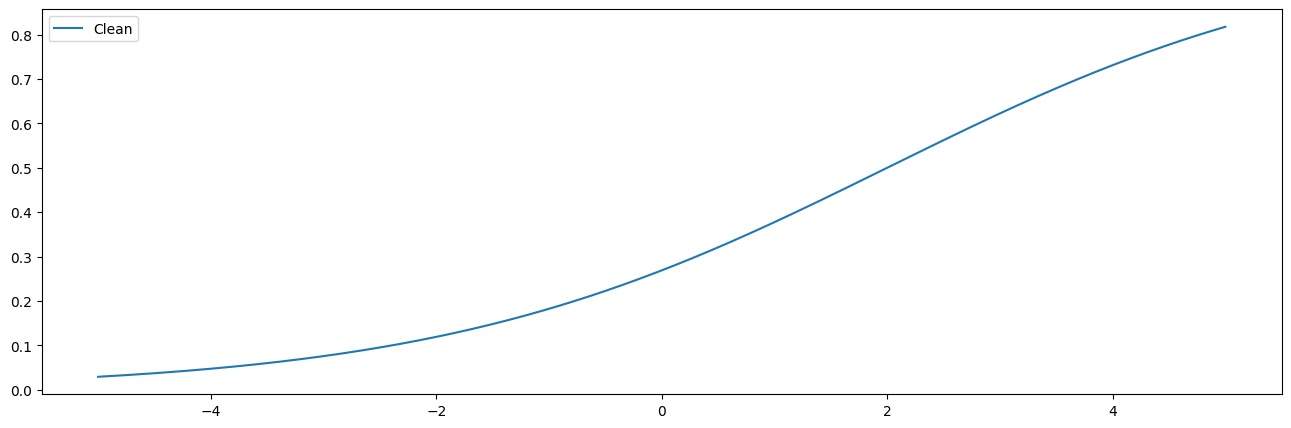

In [58]:
N = 500
x = np.linspace(-5, 5, N)
w1 = 0.5
w0 = -1
X = np.c_[x, np.ones(N)]
w = np.array([w1, w0])
y = np.dot(X, w)
y = sigmoide(y)

# var = 0.99999
# # noise = np.random.normal(0, var, N)
# noise = np.sqrt(var) * np.random.randn(N)
# Yn = y + noise

plt.figure(figsize=(16, 5))
plt.plot(x, y, label='Clean')
# plt.plot(x, Yn, label='Noisy')
plt.legend()
plt.show()

In [255]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation='tanh', input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation='tanh'))

In [265]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

In [276]:
model.fit(X, y, epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3424e-06 
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3902e-06 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3630e-06 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2750e-05 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2145e-06 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5380e-06 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3393e-05 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9292e-05 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1777e-05 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5029e-06  
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7324e-06 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1465e-06  
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8163e-06  
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2895e-06

In [279]:
y_e = model.predict(X)
error = abs(y-y_e).mean()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


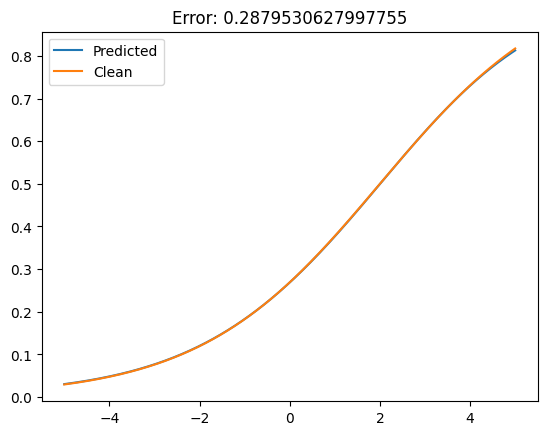

In [280]:
plt.title(f'Error: {error}')
plt.plot(x, y_e, label='Predicted')
plt.plot(x, y, label='Clean')
plt.legend()
plt.show()